In [1]:
import os,sys, h5py, pdb,time, glob
from importlib import reload
import pylab as pl, numpy as np
from numpy import log10 as log, log as ln
from astropy import units as un, constants as cons
import scipy, scipy.stats
from matplotlib import ticker, patches
from mpl_toolkits.mplot3d import Axes3D
sys.path.append('../../pysrc')

In [2]:
import workdirs as wd
import FIRE_files as ff
from FIRE_files import cosmo, u
from projectPlotBasics import *
import first_pass as l
cmap = pl.get_cmap('viridis')
figdir = wd.basedir+'figures/'

Behroozi+18 not loaded
palettable colormaps are not installed
don't have phil's colormaps


In [3]:
CF_path = '../../../cooling_flow/pysrc'
sys.path.append(CF_path)
import cooling_flow as CF, HaloPotential as Halo
import WiersmaCooling as Cool
%matplotlib inline

/mnt/home/jstern/gizmo_analysis/ipynb/subsonic_solution/../../pysrc/FIRE_files.py:1017: RuntimeWarning: invalid value encountered in sqrt
  return (tmp.sum(axis=0)/3.)**0.5
/mnt/home/jstern/gizmo_analysis/ipynb/subsonic_solution/../../pysrc/FIRE_files.py:1016: RuntimeWarning: invalid value encountered in subtract
  tmp=np.array([self.profile1D('v%s'%d,weight,power=2,minT=minT) - self.profile1D('v%s'%d,weight,minT=minT)**2 for d in ('rs','_phi','_theta')])
/tmp/ipykernel_1514014/1475519228.py:43: RuntimeWarning: invalid value encountered in accumulate
  pl.sca(axs[0]); pl.loglog(prof.rs_midbins()[ind:], rad[ind:].cumsum(),lw=lw,c=c,label=simname)
/mnt/home/jstern/gizmo_analysis/ipynb/subsonic_solution/../../pysrc/FIRE_files.py:878: RuntimeWarning: invalid value encountered in true_divide
  normed_hist = [hist[i,:]/hist[0,:] for i in range(1,hist.shape[0])]


saved vrs_MW_minT_300000
saved v_phi_MW_minT_300000
saved vrs2_MW
saved vrs_MW
saved v_phi2_MW
saved v_phi_MW
saved v_theta2_MW
saved v_theta_MW
saved cs_MW
saved vrs_MW_minT_300000


/mnt/home/jstern/gizmo_analysis/ipynb/subsonic_solution/../../pysrc/FIRE_files.py:341: RuntimeWarning: divide by zero encountered in true_divide
  return j_z / (self.rs()*self.sin_theta(z_vec))


saved v_phi_MW_minT_300000
saved vrs2_MW
saved vrs_MW
saved v_phi2_MW
saved v_phi_MW


/mnt/home/jstern/gizmo_analysis/ipynb/subsonic_solution/../../pysrc/FIRE_files.py:347: RuntimeWarning: invalid value encountered in multiply
  vtheta2 *= vtheta2>0 #avoid nans


saved v_theta2_MW
saved v_theta_MW
saved cs_MW
saved vrs_MW_minT_300000
saved v_phi_MW_minT_300000
saved vrs2_MW
saved vrs_MW
saved v_phi2_MW
saved v_phi_MW
saved v_theta2_MW
saved v_theta_MW
saved cs_MW
saved vrs_MW_minT_300000
saved v_phi_MW_minT_300000
saved vrs2_MW
saved vrs_MW
saved v_phi2_MW
saved v_phi_MW
saved v_theta2_MW
saved v_theta_MW
saved cs_MW
saved vrs_MW_minT_300000
saved v_phi_MW_minT_300000
saved vrs2_MW
saved vrs_MW
saved v_phi2_MW
saved v_phi_MW
saved v_theta2_MW
saved v_theta_MW
saved cs_MW


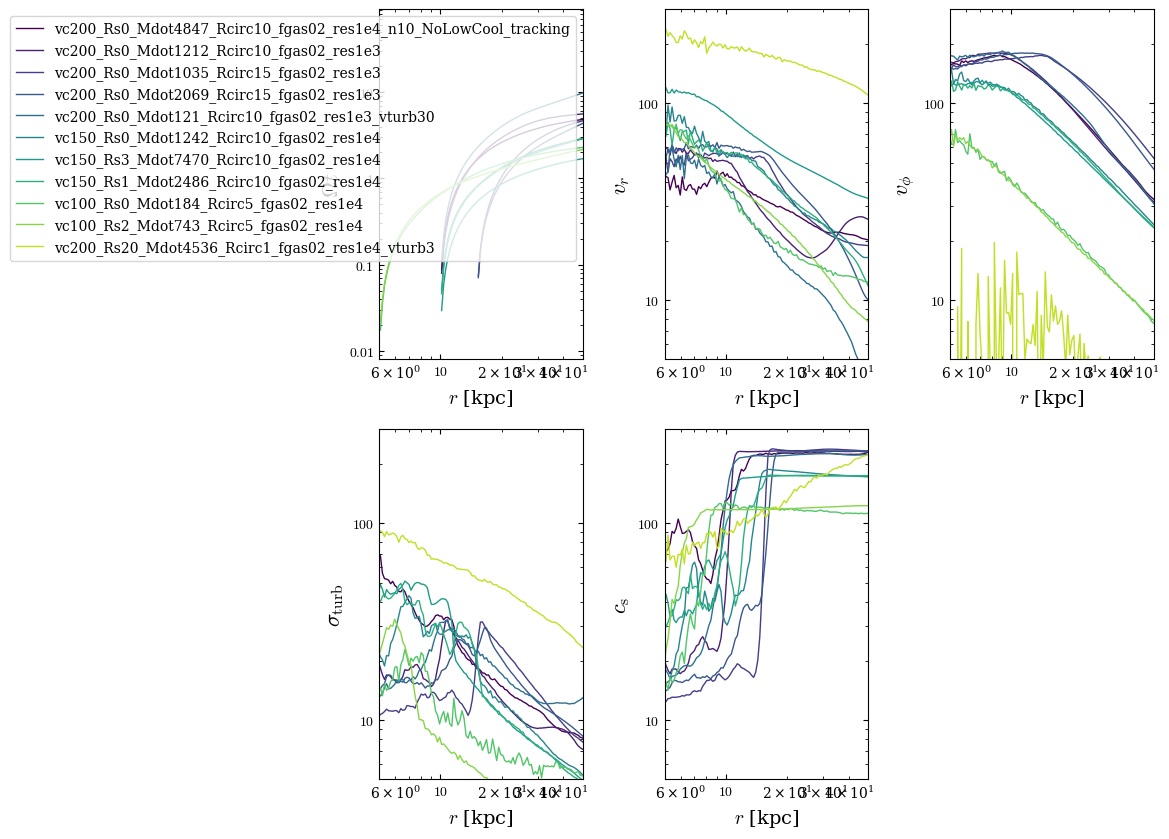

In [4]:
simnames = ('vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking',
            #'vc200_Rs0_Mdot226_Rcirc1_fgas02_res1e4_vturb3',
            #'vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3',
            #'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e4_vturb10',
            #'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e4_vturb30',
            #'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e4_vturb100',
            #'vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3',
            'vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3',
            ##'vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3',
            #'vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3',
            'vc200_Rs0_Mdot121_Rcirc10_fgas02_res1e3_vturb30', 
            'vc150_Rs0_Mdot1242_Rcirc10_fgas02_res1e4',
            'vc150_Rs3_Mdot7470_Rcirc10_fgas02_res1e4',
            'vc150_Rs1_Mdot2486_Rcirc10_fgas02_res1e4',
            'vc100_Rs0_Mdot184_Rcirc5_fgas02_res1e4',
            'vc100_Rs2_Mdot743_Rcirc5_fgas02_res1e4',
            'vc200_Rs20_Mdot4536_Rcirc1_fgas02_res1e4_vturb3',
           )
pl.figure(figsize=(10,10)); pl.subplots_adjust(wspace=0.4)
axs = [pl.subplot(2,3,i+1) for i in range(5)]
for isim,simname in enumerate(simnames):
    c = pl.get_cmap('viridis')(isim/len(simnames))
    vc = float(simname.split('_')[0][2:]) * un.km/un.s 
    Rcirc = float(simname.split('_')[3][5:]) * un.kpc  
    simdir = '/mnt/home/jstern/Drummond_data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,200*un.kpc,origin=np.zeros(3),Rcirc = Rcirc,snapshot_dt_Myr=50,pr=False,
          analyticGravity= Halo.PowerLaw(m=0.,vc_Rvir=vc,Rvir=200*un.kpc))
    sim.z = 0 #for cooling function
    iSnapshot = sim.Nsnapshots()-1        
    snapshot = sim.getSnapshot(iSnapshot)
    prof = sim.getProfiler(iSnapshot)
    rs = prof.rs_midbins()
    v_r =   -prof.profile1D('vrs','MW',minT=3e5)  #km/s
    dts = prof.drs_midbins() / v_r 
    v_phi = prof.profile1D('v_phi','MW',minT=3e5) #km/s
    sigma_turb = prof.sigma_turb('MW')
    Omega = v_phi / rs
    rad = Omega*dts #dimensionless
    ind = np.searchsorted(rs,Rcirc)
    lw=1
    pl.sca(axs[0]); pl.loglog(prof.rs_midbins()[ind:], rad[ind:].cumsum(),lw=lw,c=c,label=simname)
    pl.sca(axs[1]); pl.loglog(rs,v_r,c=c,lw=lw)
    pl.sca(axs[2]); pl.loglog(rs,v_phi,c=c,lw=lw)
    pl.sca(axs[3]); pl.loglog(rs,sigma_turb,c=c,lw=lw)
    pl.sca(axs[4]); pl.loglog(rs, prof.profile1D('cs','MW') ,c=c,lw=lw)
    prof.tofile()   
    #pl.title(simname)
for iax,ax in enumerate(axs):
    pl.sca(ax)
    pl.ylabel((r'$\Omega t$',r'$v_r$',r'$v_\phi$',r'$\sigma_{\rm turb}$',r'$c_{\rm s}$')[iax],fontsize=16)
    pl.xlim(5,50)
    ax.xaxis.set_major_formatter(u.arilogformatter)
    ax.yaxis.set_major_formatter(u.arilogformatter)
    if iax==0: pl.legend()
    else: pl.ylim(5,300)
    pl.axvline(Rcirc.value,lw=0.5,c='.5')
    pl.xlabel(r'$r$ [kpc]',fontsize=14)
    #pl.ylim(0.1,400)
    #pl.savefig(figdir+'turb_analysis_Mdot%d.pdf'%Mdot)

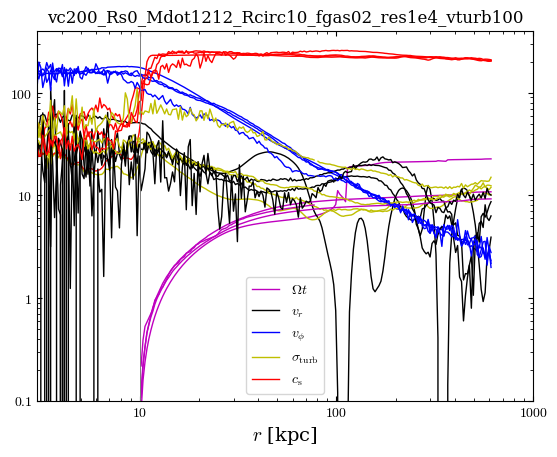

In [6]:
simnames = (#'vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking',
            #'vc200_Rs0_Mdot226_Rcirc1_fgas02_res1e4_vturb3',
            #'vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e4_vturb10',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e4_vturb30',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e4_vturb100',
            #'vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3',
            #'vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3',
            #'vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3',
            ##'vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3',
            #'vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3',
            #'vc200_Rs0_Mdot121_Rcirc10_fgas02_res1e3_vturb30',            
           )
for isim,simname in enumerate(simnames):
    vc = float(simname.split('_')[0][2:]) * un.km/un.s 
    Rcirc = float(simname.split('_')[3][5:]) * un.kpc
    #pl.figure()
    ax = pl.subplot(111)
    pl.subplots_adjust(wspace=0.4)
    simdir = '/mnt/home/jstern/Drummond_data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,200*un.kpc,origin=np.zeros(3),Rcirc = Rcirc,snapshot_dt_Myr=50,pr=False,
          analyticGravity= Halo.PowerLaw(m=0.,vc_Rvir=vc,Rvir=200*un.kpc))
    sim.z = 0 #for cooling function
    iSnapshot = sim.Nsnapshots()-1        
    snapshot = sim.getSnapshot(iSnapshot)
    prof = sim.getProfiler(iSnapshot)
    rs = prof.rs_midbins()
    v_r =   -prof.profile1D('vrs','MW',minT=3e5)  #km/s
    dts = prof.drs_midbins() / v_r 
    v_phi = prof.profile1D('v_phi','MW',minT=3e5) #km/s
    sigma_turb = prof.sigma_turb('MW')
    Omega = v_phi / rs
    rad = Omega*dts #dimensionless
    ind = np.searchsorted(rs,Rcirc)
    pl.semilogx(prof.rs_midbins()[ind:], rad[ind:].cumsum(),lw=lw,c='m',label=r'$\Omega t$')
    pl.loglog(rs,v_r,c='k',lw=lw,label=r'$v_r$')
    pl.loglog(rs,v_phi,c='b',lw=lw,label=r'$v_\phi$')
    pl.loglog(rs,sigma_turb,c='y',lw=lw,label=r'$\sigma_{\rm turb}$')
    pl.loglog(rs, prof.profile1D('cs','MW') ,c='r',lw=lw,label=r'$c_{\rm s}$')
    prof.tofile()   
    pl.title(simname)
    pl.xlim(3,1000)
    ax.xaxis.set_major_formatter(u.arilogformatter)
    ax.yaxis.set_major_formatter(u.arilogformatter)
    if isim==0: pl.legend()
    pl.axvline(Rcirc.value,lw=0.5,c='.5')
    pl.xlabel(r'$r$ [kpc]',fontsize=14)
    pl.ylim(0.1,400)
    #pl.savefig(figdir+'turb_analysis_Mdot%d.pdf'%Mdot)

# total rotation vs. tcool/tff

In [4]:
def smooth(arr,kernel_size = 30):
    kernel = np.ones(kernel_size) / kernel_size
    return np.convolve(arr, kernel, mode='same')


In [5]:
#grep "(r3d>10)" */gizmo/init.c > ~/ceph/sim_analysis/metallicities.txt
Cool.dataDir = '/mnt/home/jstern/cooling_flow/cooling/Wiersma09_CoolingTables/'
fn = '/mnt/home/jstern/ceph/sim_analysis/metallicities.txt'
Zdic = {}; LambdaDic = {}
f = open(fn)
for line in f.readlines():
    simname = line.split('/')[0]
    if simname[:2]!='vc': continue
    vc = float(simname[2:5])
    Zdic[simname]      = float(line.split('*')[-1].split(';')[0])
    LambdaDic[simname] = Cool.Wiersma_Cooling(Zdic[simname],0).LAMBDA(2e6*un.K*(vc/200)**2,0.1*un.cm**-3)
tratio = lambda r,vc,Mdot,Lambda: (20**0.5/3 * 0.13 * (r/10)**-0.5 * (vc/200)**-2*Mdot**0.5*(Lambda/1e-22)**0.5)**-1

/mnt/home/jstern/gizmo_analysis/ipynb/subsonic_solution/../../../cooling_flow/pysrc/WiersmaCooling.py:53: RuntimeWarning: invalid value encountered in log10
  vals = log(self.LAMBDA(X*un.K,Y*un.cm**-3).value)


In [35]:
(1.6**0.5*(LambdaDic[simnames[4]]/1e-22)**0.5)**-1*6.3

<Quantity 9.19689568 s(1/2) / (cm(3/2) erg(1/2))>

# plot metallicities

vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking Z=0.1
vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3 Z=0.1
vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3 Z=0.1
vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3 Z=3.0
vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3 Z=0.3
vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3 Z=0.3
vc200_Rs20_Mdot4536_Rcirc1_fgas02_res1e4_vturb3 Z=20.0
vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3 Z=0.3
vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3 Z=0.3


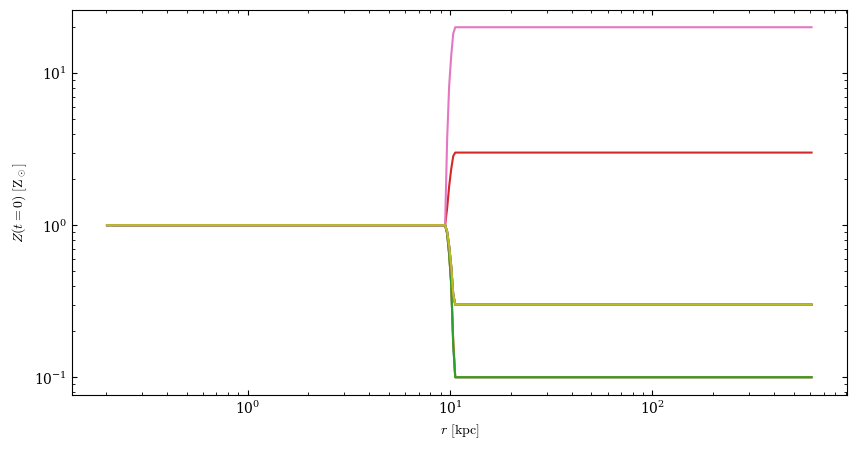

In [6]:
simnames = ('vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking',
            'vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3',
            'vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3',
            'vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3',
            'vc200_Rs20_Mdot4536_Rcirc1_fgas02_res1e4_vturb3',
            'vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3',
            'vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3'
            #'vc200_Rs0_Mdot121_Rcirc10_fgas02_res1e3_vturb30', 
           )
pl.figure(figsize=(10,5)); pl.subplots_adjust(wspace=0.4)
for isim,simname in enumerate(simnames):
    vc    = float(simname.split('_')[0][2:]) * un.km/un.s 
    Rcirc = float(simname.split('_')[3][5:]) * un.kpc  
    Mdot  = float(simname.split('_')[2][4:]) /1000 * un.Msun/un.yr
    Rvir = 200*un.kpc
    simdir = '/mnt/home/jstern/Drummond_data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,Rvir,origin=np.zeros(3),Rcirc = Rcirc,snapshot_dt_Myr=50,pr=False,
          analyticGravity= Halo.PowerLaw(m=0.,vc_Rvir=vc,Rvir=Rvir))
    sim.z = 0 #for cooling function
    iSnapshot = 0
    snapshot = sim.getSnapshot(iSnapshot)
    prof = sim.getProfiler(iSnapshot)
    rs = prof.rs_midbins()
    Zs = prof.profile1D('Z2Zsuns','MW')
    pl.loglog(rs,Zs,label=simname)
    print(simname,'Z=%.1f'%Zs[-1])
    prof.tofile() 
    pl.xlabel(r'$r\ [{\rm kpc}]$')
    pl.ylabel(r'$Z(t=0)\ [{\rm Z}_\odot]$')
    #pl.legend()

vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3


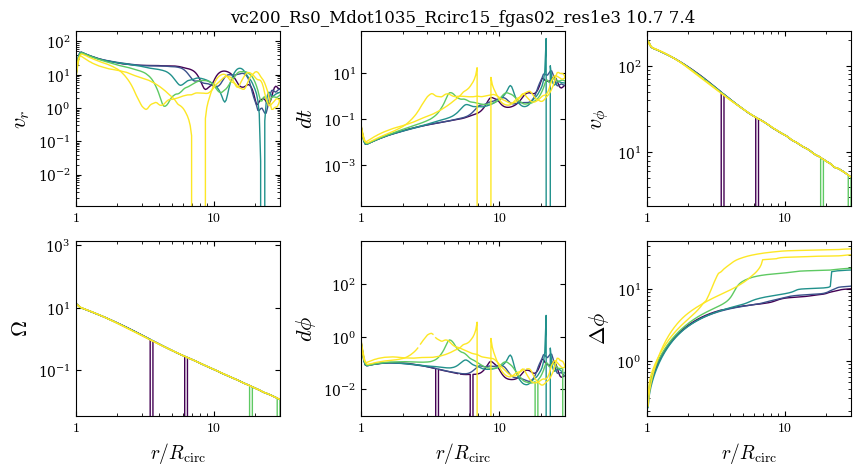

In [43]:
simnames = ('vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking',
            'vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3',
            'vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3',
            'vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3',
            'vc200_Rs20_Mdot4536_Rcirc1_fgas02_res1e4_vturb3',
            'vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3',
            'vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3',
            #'vc200_Rs0_Mdot121_Rcirc10_fgas02_res1e3_vturb30', 
            'vc150_Rs0_Mdot1242_Rcirc10_fgas02_res1e4',
            'vc150_Rs3_Mdot7470_Rcirc10_fgas02_res1e4',
            'vc150_Rs1_Mdot2486_Rcirc10_fgas02_res1e4',
            'vc100_Rs0_Mdot184_Rcirc5_fgas02_res1e4',
            'vc100_Rs2_Mdot743_Rcirc5_fgas02_res1e4',
           )
Nsnapshots = len(np.arange(-1,-12,-2))
total_rot = np.zeros((len(simnames),Nsnapshots))
Mdot_measured = np.zeros((len(simnames),Nsnapshots))
t_ratios = np.zeros((len(simnames),Nsnapshots))
#t_ratios = np.zeros(len(simnames))
for isim,simname in enumerate(simnames[4:5]):
    print(simname)
    pl.figure(figsize=(10,5)); pl.subplots_adjust(wspace=0.4)
    axs = [pl.subplot(2,3,i+1) for i in range(6)]    
    lw = 1
    vc = float(simname.split('_')[0][2:]) * un.km/un.s 
    Rcirc = float(simname.split('_')[3][5:]) * un.kpc  
    Mdot = float(simname.split('_')[2][4:]) /1000 * un.Msun/un.yr
    Rvir = 200*un.kpc
    simdir = '/mnt/home/jstern/Drummond_data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,Rvir,origin=np.zeros(3),Rcirc = Rcirc,snapshot_dt_Myr=50,pr=False,
          analyticGravity= Halo.PowerLaw(m=0.,vc_Rvir=vc,Rvir=Rvir))
    sim.z = 0 #for cooling function
    for ii,iSnapshot in enumerate(np.arange(sim.Nsnapshots()-1,sim.Nsnapshots()-12,-2)):
        c = pl.get_cmap('viridis')(ii/4)
        snapshot = sim.getSnapshot(iSnapshot)
        prof = sim.getProfiler(iSnapshot)
        rs = prof.rs_midbins()
        v_r =   -prof.profile1D_multiple(['vrs'],'MW')[0]  #km/s
        dts = prof.drs_midbins() / v_r 
        v_phi = prof.profile1D_multiple(['v_phi'],'MW')[0] #km/s
        Omega = v_phi / rs
        dphi = Omega*dts #dimensionless    
        goods = (v_r>0) & (v_phi>0) & ~np.isnan(v_r) & ~np.isnan(v_phi) & ~np.isinf(v_r) & ~np.isinf(v_phi)
        ind = np.searchsorted(rs[goods],Rcirc.value)        
        rot = dphi[goods][ind:].cumsum()
        #pl.sca(axs[0]); pl.semilogx(rs[ind:]/Rcirc, rot,lw=lw,c=c,label=simname)
        pl.sca(axs[0]); pl.loglog(rs/Rcirc,v_r,c=c,lw=lw)
        pl.sca(axs[1]); pl.loglog(rs/Rcirc,dts,c=c,lw=lw)
        pl.sca(axs[2]); pl.loglog(rs/Rcirc,v_phi,c=c,lw=lw)
        pl.sca(axs[3]); pl.loglog(rs/Rcirc,Omega,c=c,lw=lw)
        pl.sca(axs[4]); pl.loglog(rs/Rcirc,dphi,c=c,lw=lw)
        pl.sca(axs[5]); pl.loglog(rs[goods][ind:]/Rcirc,rot,c=c,lw=lw)

        ind2 = np.searchsorted(rs[goods][ind:]/Rcirc.value,10)
        total_rot[isim,ii] = rot[ind2]
        #t_ratios[isim] = prof.atRcirc(prof.t_cool()/prof.t_ff())
        Mdot_measured[isim,ii] = np.interp(2*Rcirc.value, prof.rs_midbins(),prof.MdotProfile())
        t_ratios[isim,ii] = tratio(Rcirc.value,vc.value,-Mdot_measured[isim,ii],
                                    LambdaDic[simname].value)
        prof.tofile()           

    for iax,ax in enumerate(axs):
        if iax==2: pl.title('%s %.1f %.1f'%(simname,t_ratios[isim,-1],total_rot[isim,0]))
        pl.sca(ax)
        pl.ylabel((r'$v_r$',r'$dt$', r'$v_\phi$',r'$\Omega$',r'$d\phi$',r'$\Delta \phi$')[iax],fontsize=16)
        pl.xlim(1,30)
        ax.xaxis.set_major_formatter(u.arilogformatter)
        if iax>2: pl.xlabel(r'$r/R_{\rm circ}$',fontsize=14)
    #pl.ylim(0.1,400)
    #pl.savefig(figdir+'turb_analysis_Mdot%d.pdf'%Mdot)

vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking
vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3
vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3
vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3
vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3
vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3
vc200_Rs20_Mdot4536_Rcirc1_fgas02_res1e4_vturb3
vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3
vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3
vc150_Rs0_Mdot1242_Rcirc10_fgas02_res1e4
vc150_Rs3_Mdot7470_Rcirc10_fgas02_res1e4
vc150_Rs1_Mdot2486_Rcirc10_fgas02_res1e4
vc100_Rs0_Mdot184_Rcirc5_fgas02_res1e4
vc100_Rs2_Mdot743_Rcirc5_fgas02_res1e4


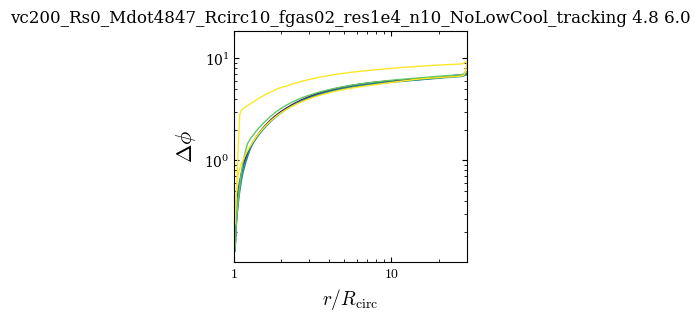

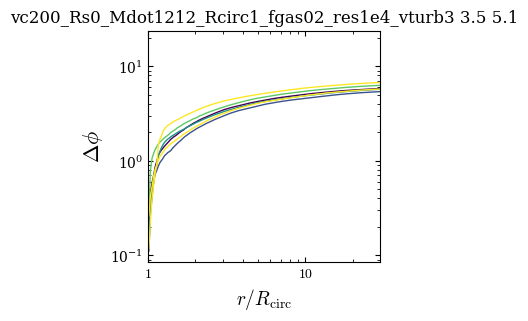

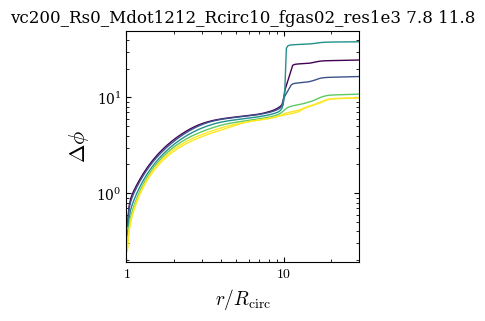

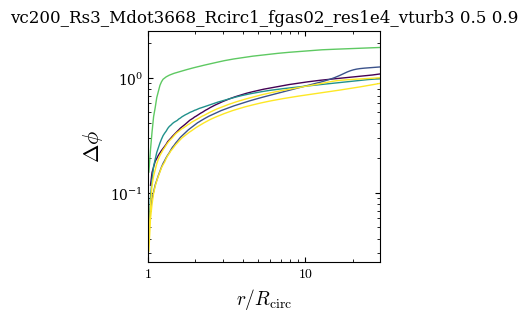

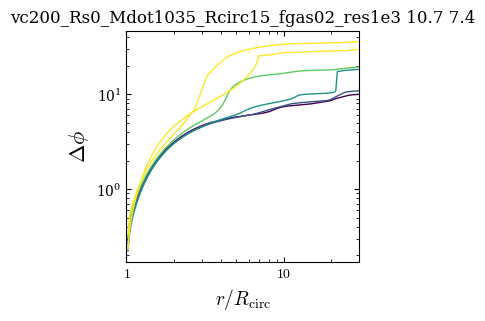

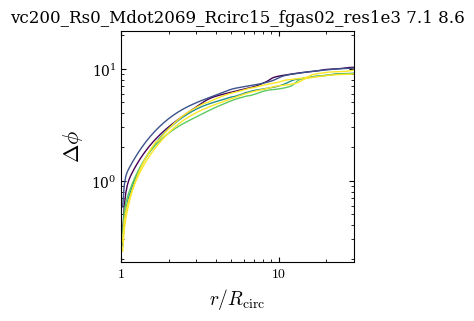

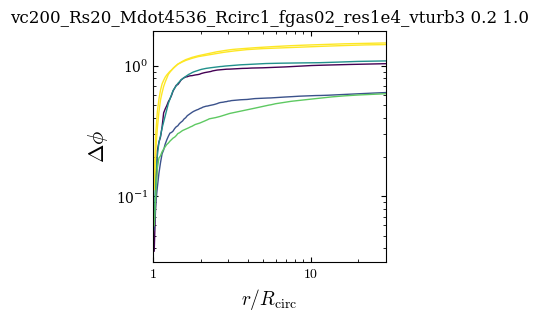

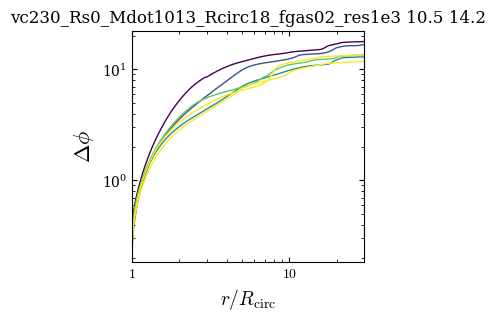

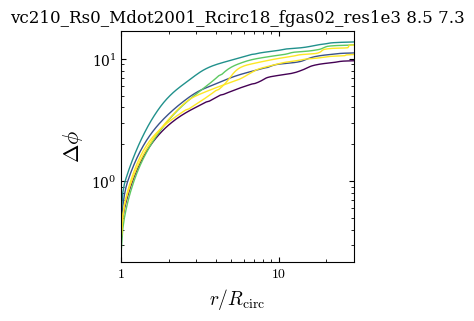

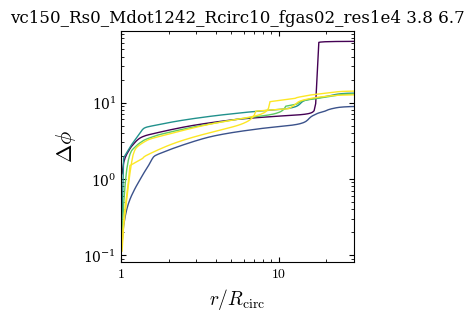

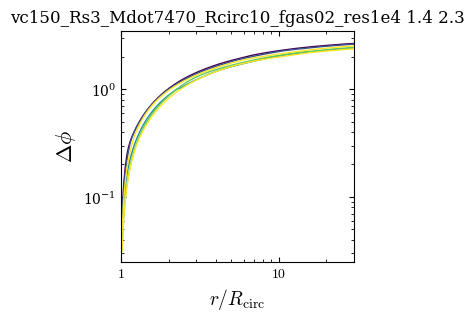

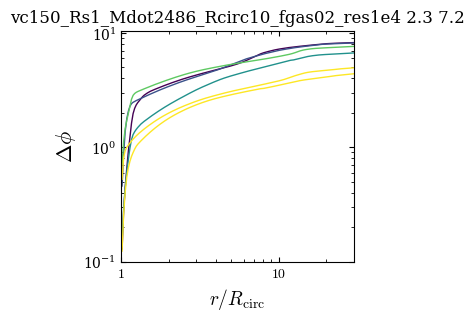

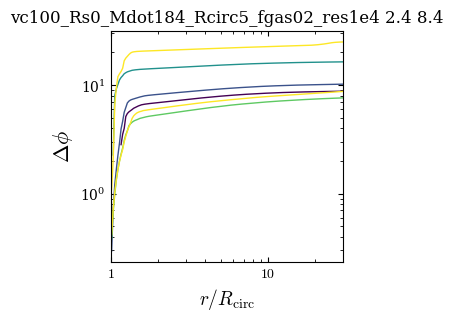

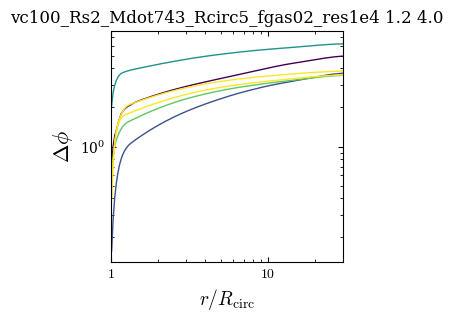

In [61]:
simnames = ('vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking',
            'vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3',
            'vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3',
            'vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3',
            'vc200_Rs20_Mdot4536_Rcirc1_fgas02_res1e4_vturb3',
            'vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3',
            'vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3',
            #'vc200_Rs0_Mdot121_Rcirc10_fgas02_res1e3_vturb30', 
            'vc150_Rs0_Mdot1242_Rcirc10_fgas02_res1e4',
            'vc150_Rs3_Mdot7470_Rcirc10_fgas02_res1e4',
            'vc150_Rs1_Mdot2486_Rcirc10_fgas02_res1e4',
            'vc100_Rs0_Mdot184_Rcirc5_fgas02_res1e4',
            'vc100_Rs2_Mdot743_Rcirc5_fgas02_res1e4',
           )
Nsnapshots = len(np.arange(-1,-12,-2))
total_rot = np.zeros((len(simnames),Nsnapshots))
Mdot_measured = np.zeros((len(simnames),Nsnapshots))
t_ratios = np.zeros((len(simnames),Nsnapshots))
#t_ratios = np.zeros(len(simnames))
for isim,simname in enumerate(simnames):
    print(simname)
    pl.figure(figsize=(3,3)); ax = pl.subplot(111)
    lw = 1
    vc = float(simname.split('_')[0][2:]) * un.km/un.s 
    Rcirc = float(simname.split('_')[3][5:]) * un.kpc  
    Mdot = float(simname.split('_')[2][4:]) /1000 * un.Msun/un.yr
    Rvir = 200*un.kpc
    simdir = '/mnt/home/jstern/Drummond_data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,Rvir,origin=np.zeros(3),Rcirc = Rcirc,snapshot_dt_Myr=50,pr=False,
          analyticGravity= Halo.PowerLaw(m=0.,vc_Rvir=vc,Rvir=Rvir))
    sim.z = 0 #for cooling function
    for ii,iSnapshot in enumerate(np.arange(sim.Nsnapshots()-1,sim.Nsnapshots()-12,-2)):
        c = pl.get_cmap('viridis')(ii/4)
        snapshot = sim.getSnapshot(iSnapshot)
        prof = sim.getProfiler(iSnapshot)
        rs = prof.rs_midbins()
        v_r =   -prof.profile1D_multiple(['vrs'],'MW')[0]  #km/s
        dts = prof.drs_midbins() / v_r 
        v_phi = prof.profile1D_multiple(['v_phi'],'MW')[0] #km/s
        Omega = v_phi / rs
        dphi = Omega*dts #dimensionless    
        goods = (v_r>0) & (v_phi>0) & ~np.isnan(v_r) & ~np.isnan(v_phi) & ~np.isinf(v_r) & ~np.isinf(v_phi)
        ind = np.searchsorted(rs[goods],Rcirc.value)        
        rot = dphi[goods][ind:].cumsum()
        pl.loglog(rs[goods][ind:]/Rcirc,rot,c=c,lw=lw)

        ind2 = np.searchsorted(rs[goods][ind:]/Rcirc.value,10)
        total_rot[isim,ii] = rot[ind2]
        #t_ratios[isim] = prof.atRcirc(prof.t_cool()/prof.t_ff())
        Mdot_measured[isim,ii] = np.interp(2*Rcirc.value, prof.rs_midbins(),prof.MdotProfile())
        t_ratios[isim,ii] = tratio(Rcirc.value,vc.value,-Mdot_measured[isim,ii],
                                    LambdaDic[simname].value)
        prof.tofile()           

    pl.title('%s %.1f %.1f'%(simname,t_ratios[isim,-1],total_rot[isim,0]))
    pl.ylabel(r'$\Delta \phi$',fontsize=16)
    pl.xlim(1,30)
    ax.xaxis.set_major_formatter(u.arilogformatter)
    pl.xlabel(r'$r/R_{\rm circ}$',fontsize=14)
    #pl.ylim(0.1,400)

1.720 0.010 vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking
1.526 0.041 vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3
2.246 0.052 vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3
1.144 0.085 vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3
1.524 0.085 vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3
[1.87140495 1.91456778 1.84422958 1.58867403 1.22940232 1.19517604]
1.544 0.055 vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3
1.180 0.069 vc200_Rs20_Mdot4536_Rcirc1_fgas02_res1e4_vturb3
2.834 0.147 vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3
1.761 0.112 vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3
1.021 0.023 vc150_Rs0_Mdot1242_Rcirc10_fgas02_res1e4
1.175 0.019 vc150_Rs3_Mdot7470_Rcirc10_fgas02_res1e4
1.087 0.051 vc150_Rs1_Mdot2486_Rcirc10_fgas02_res1e4
1.209 0.031 vc100_Rs0_Mdot184_Rcirc5_fgas02_res1e4
1.073 0.040 vc100_Rs2_Mdot743_Rcirc5_fgas02_res1e4


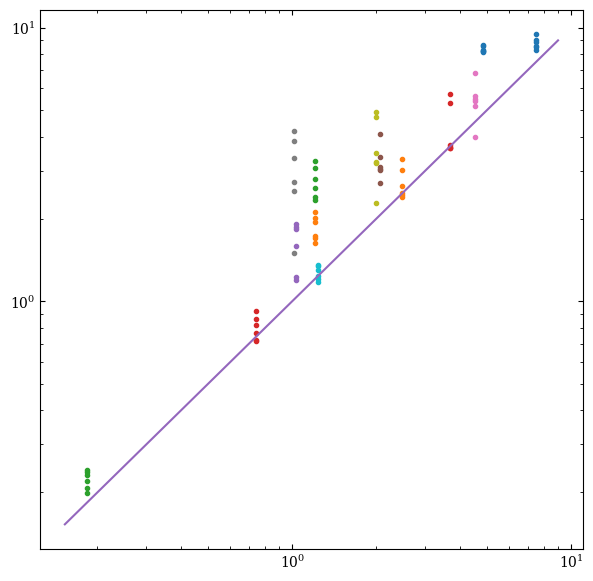

In [62]:
Nsnapshots = len(np.arange(-1,-12,-2))
mns = np.zeros(len(simnames)); stds = np.zeros(len(simnames))
pl.figure(figsize=(7,7)); ax = pl.subplot(111)
for isim,simname in enumerate(simnames):
    Mdot = float(simname.split('_')[2][4:]) /1000 * un.Msun/un.yr
    pl.plot([Mdot.value]*Nsnapshots, -Mdot_measured[isim,:],'.',label=simname)
    mns[isim] = 10.**(log(-Mdot_measured[isim,:]).mean())/Mdot.value
    stds[isim] = log(-Mdot_measured[isim,:]).std()
    print('%.3f %.3f %s'%(mns[isim],stds[isim],simname))
    if isim==4:
        print(-Mdot_measured[isim,:])
pl.loglog()
u.plotLine()
#pl.legend()
 

In [63]:
[np.percentile(mns,p) for p in (16,50,84)]

[1.0915667230995447, 1.3668556853824394, 1.7575533669170729]

In [64]:
mns

array([1.7199185 , 1.5259882 , 2.24560959, 1.1438733 , 1.5243874 ,
       1.54357872, 1.18029834, 2.83416886, 1.76082596, 1.02122645,
       1.17496333, 1.08701833, 1.20932397, 1.0732678 ])

In [65]:
total_rot[4]

array([ 7.44581771,  7.65009128,  8.61156751, 16.70735903, 33.73668809,
       27.44020887])

8.3 4.9 5.9 vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking
1.8 3.3 5.0 vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3
2.7 8.6 9.3 vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3
3.7 0.5 0.8 vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3
1.7 8.9 12.0 vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3
3.1 6.7 7.4 vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3
5.4 0.2 1.0 vc200_Rs20_Mdot4536_Rcirc1_fgas02_res1e4_vturb3
3.0 11.9 11.2 vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3
3.3 8.3 9.6 vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3
1.3 3.6 7.8 vc150_Rs0_Mdot1242_Rcirc10_fgas02_res1e4
8.7 1.4 2.1 vc150_Rs3_Mdot7470_Rcirc10_fgas02_res1e4
2.6 2.5 5.8 vc150_Rs1_Mdot2486_Rcirc10_fgas02_res1e4
0.2 2.4 9.1 vc100_Rs0_Mdot184_Rcirc5_fgas02_res1e4
0.8 1.3 3.3 vc100_Rs2_Mdot743_Rcirc5_fgas02_res1e4


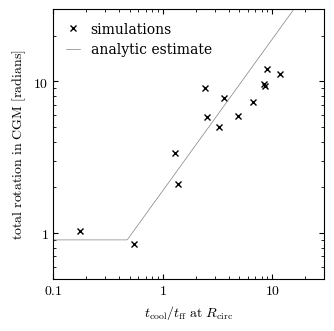

In [66]:
fig = pl.figure(figsize=(3.5,3.5))
ax = pl.subplot(111)
pl.loglog(10.**np.median(log(t_ratios),axis=1), 10.**np.median(log(total_rot),axis=1),'x',c='k',ms=5,label='simulations')
#pl.errorbar(10.**log(t_ratios).mean(axis=1), (log(total_rot).mean(axis=1)), (log(total_rot).std(axis=1)),ls='None',c='k',ms=5,label='simulations')

ax.xaxis.set_major_formatter(u.arilogformatter)
ax.yaxis.set_major_formatter(u.arilogformatter)
pl.xlabel(r'$t_{\rm cool} / t_{\rm ff}\ {\rm at}\ R_{\rm circ}$')
pl.ylabel(r'${\rm total\ rotation\ in\ CGM}\ [{\rm radians}]$')
pl.xlim(0.1,30)
pl.ylim(0.5,30)
_xs = np.arange(0.1,30,0.01)
pl.plot(_xs,ff.u.maxarray(1.9*_xs,0.9),c='.5',ls='-',lw=0.5,label='analytic estimate')
pl.legend(loc='upper left',frameon=False,handlelength=1)
pl.savefig(figdir+'total_rotation.pdf')
for isim,simname in enumerate(simnames):
    print('%.1f %.1f %.1f %s'%(np.median(-Mdot_measured[isim]),10.**np.median(log(t_ratios[isim])),
                          10.**np.median(log(total_rot[isim])),simname))

In [67]:
figdir

'/mnt/home/jstern/gizmo_analysis/figures/'

# particle tracking of these sims

### command for running particle tracking shell script

In [4]:
simnames = ('vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking',
            'vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3',
            'vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3',
            'vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3',
            'vc200_Rs20_Mdot4536_Rcirc1_fgas02_res1e4_vturb3',
            'vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3',
            'vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3',
            #'vc200_Rs0_Mdot121_Rcirc10_fgas02_res1e3_vturb30', 
            'vc150_Rs0_Mdot1242_Rcirc10_fgas02_res1e4',
            'vc150_Rs3_Mdot7470_Rcirc10_fgas02_res1e4',
            'vc150_Rs1_Mdot2486_Rcirc10_fgas02_res1e4',
            'vc100_Rs0_Mdot184_Rcirc5_fgas02_res1e4',
            'vc100_Rs2_Mdot743_Rcirc5_fgas02_res1e4',
           )
Nsnapshots,dt,rmax,subsample = 35,50,40,10
for isim,simname in enumerate(simnames):
    vc = float(simname.split('_')[0][2:]) * un.km/un.s 
    Rcirc = float(simname.split('_')[3][5:]) * un.kpc  
    Mdot = float(simname.split('_')[2][4:]) /1000 * un.Msun/un.yr
    Rvir = 200*un.kpc
    simdir = '/mnt/home/jstern/Drummond_data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,Rvir,origin=np.zeros(3),Rcirc = Rcirc,snapshot_dt_Myr=50,pr=False,
          analyticGravity= Halo.PowerLaw(m=0.,vc_Rvir=vc,Rvir=Rvir))
    lastSnapshot = sim.Nsnapshots()-1
    dSnapshot = 2
    snapshotInds = np.arange(lastSnapshot-10,lastSnapshot,dSnapshot)
    print()
    print(lastSnapshot,lastSnapshot-10,lastSnapshot-10-Nsnapshots )
    print('sbatch rusty_run.sh %s %d_%d_%d_%d_%d_%d %d %d %d'%(simname,
                                                               Nsnapshots*dt,dt,rmax,
                                                               vc.value,Rcirc.value,subsample,
                                                               snapshotInds[0],snapshotInds[-1],dSnapshot))


324 314 279
sbatch rusty_run.sh vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking 1750_50_40_200_10_10 314 322 2

151 141 106
sbatch rusty_run.sh vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3 1750_50_40_200_1_10 141 149 2

155 145 110
sbatch rusty_run.sh vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3 1750_50_40_200_10_10 145 153 2

79 69 34
sbatch rusty_run.sh vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3 1750_50_40_200_1_10 69 77 2

71 61 26
sbatch rusty_run.sh vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3 1750_50_40_200_15_10 61 69 2

49 39 4
sbatch rusty_run.sh vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3 1750_50_40_200_15_10 39 47 2

52 42 7
sbatch rusty_run.sh vc200_Rs20_Mdot4536_Rcirc1_fgas02_res1e4_vturb3 1750_50_40_200_1_10 42 50 2

45 35 0
sbatch rusty_run.sh vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3 1750_50_40_230_18_10 35 43 2

53 43 8
sbatch rusty_run.sh vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3 1750_50_40_210_18_10 43 51 2

130 120 85
sbatch rusty_run.sh vc150_Rs0_Mdot1242

### combine particle track files to one file

In [7]:
simnames = ('vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking',
            'vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3',
            'vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3',
            'vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3',
            'vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3',
            'vc200_Rs20_Mdot4536_Rcirc1_fgas02_res1e4_vturb3',
            'vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3',
            'vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3',
            #'vc200_Rs0_Mdot121_Rcirc10_fgas02_res1e3_vturb30', 
            'vc150_Rs0_Mdot1242_Rcirc10_fgas02_res1e4',
            'vc150_Rs3_Mdot7470_Rcirc10_fgas02_res1e4',
            'vc150_Rs1_Mdot2486_Rcirc10_fgas02_res1e4',
            'vc100_Rs0_Mdot184_Rcirc5_fgas02_res1e4',
            'vc100_Rs2_Mdot743_Rcirc5_fgas02_res1e4',
           )
goodsims = []
Nsnapshots,dt,rmax,subsample = 35,50,40,10
for isim,simname in enumerate(simnames):
    vc = float(simname.split('_')[0][2:]) * un.km/un.s 
    Rcirc = float(simname.split('_')[3][5:]) * un.kpc  
    Mdot = float(simname.split('_')[2][4:]) /1000 * un.Msun/un.yr
    Rvir = 200*un.kpc
    simdir = '/mnt/home/jstern/Drummond_data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,Rvir,origin=np.zeros(3),Rcirc = Rcirc,snapshot_dt_Myr=50,pr=False,
          analyticGravity= Halo.PowerLaw(m=0.,vc_Rvir=vc,Rvir=Rvir))
    lastSnapshot = sim.Nsnapshots()-1
    dSnapshot = 2
    snapshotInds = np.arange(lastSnapshot-10,lastSnapshot,dSnapshot)
    coords,vs,Ts,nHs,tcools = np.zeros((Nsnapshots,0,3)), np.zeros((Nsnapshots,0,3)), np.zeros((Nsnapshots,0)), np.zeros((Nsnapshots,0)), np.zeros((Nsnapshots,0))
    for lastSnapshot in snapshotInds:
        npz_fn = wd.tracksdir+simname+'/particle_tracks_%d_%d_%d_%d_%d_%d_%d.npz'%(Nsnapshots*dt,dt,rmax,vc.value,Rcirc.value,subsample,lastSnapshot)
        if os.path.exists(npz_fn):
            f = np.load(npz_fn)
        else: continue
        coords = np.concatenate([coords,f['coords']],axis=1)
        vs = np.concatenate([vs,f['vs']],axis=1)
        Ts = np.concatenate([Ts,f['Ts']],axis=1)
        nHs = np.concatenate([nHs,f['nHs']],axis=1)
        tcools = np.concatenate([tcools,f['tcools']],axis=1)
        f.close()
    if tcools.shape[1]>0:
        npz_fn = wd.tracksdir+simname+'/particle_tracks_%d_%d_%d_all.npz'%(Nsnapshots,dt,rmax)
        goodsims.append(simname)
        np.savez(npz_fn,coords=coords[:,::,...],vs=vs[:,::,...],Ts=Ts[:,::,...],nHs=nHs[:,::,...],tcools=tcools[:,::,...])
        print(npz_fn)
        print(tcools.shape)
        print()

/mnt/home/jstern/ceph/sim_analysis/particle_tracks/vc150_Rs0_Mdot1242_Rcirc10_fgas02_res1e4/particle_tracks_35_50_40_all.npz
(35, 3740)

/mnt/home/jstern/ceph/sim_analysis/particle_tracks/vc150_Rs3_Mdot7470_Rcirc10_fgas02_res1e4/particle_tracks_35_50_40_all.npz
(35, 11015)

/mnt/home/jstern/ceph/sim_analysis/particle_tracks/vc150_Rs1_Mdot2486_Rcirc10_fgas02_res1e4/particle_tracks_35_50_40_all.npz
(35, 6280)

/mnt/home/jstern/ceph/sim_analysis/particle_tracks/vc100_Rs0_Mdot184_Rcirc5_fgas02_res1e4/particle_tracks_35_50_40_all.npz
(35, 1025)

/mnt/home/jstern/ceph/sim_analysis/particle_tracks/vc100_Rs2_Mdot743_Rcirc5_fgas02_res1e4/particle_tracks_35_50_40_all.npz
(35, 2240)



In [11]:
colors = pl.get_cmap('inferno')(0.8-np.arange(l)/(l+1))
labels_short = [(r'$%.1f\pi$')%m for im,m in enumerate(theta_midbins/np.pi)]
labels = [(r'$\theta_0=%.1f\pi$')%m for im,m in enumerate(theta_midbins/np.pi)]
snapshots_after_105 = 5
snapshots_before_105 = Nsnapshots-snapshots_after_105
ts_offset = -np.arange(-snapshots_after_105*dt,(Nsnapshots-snapshots_after_105)*dt,dt)-2.2 #2.2 offset so T=10^5K exactly
def shift_arr(arr,t_offset_ind):
    shifted_arr = np.zeros(arr.shape)
    for i in range(arr.shape[1]):
        arr2 = np.array(arr[:,i])
        if t_offset_ind[i]-snapshots_after_105<0:
            arr2[t_offset_ind[i]-snapshots_after_105:]  = np.nan
        if t_offset_ind[i]+snapshots_before_105>Nsnapshots:
            arr2[:t_offset_ind[i]+snapshots_before_105-Nsnapshots]  = np.nan
        shifted_arr[:,i] = np.roll(arr2,-t_offset_ind[i])
    return np.roll(shifted_arr, snapshots_after_105,axis=0)

def med_and_std_shift(all_vals,xs=ts_offset,theta_inds=theta_inds,show_std=True,ls='-',Gyr=True):
    for i,ind in enumerate(theta_midbins):
        goods = theta_inds[i] & (t105_ind!=0)
        _vals = all_vals[:,goods]
        vals = shift_arr(_vals,t105_ind[goods])
        ys16,ys50,ys84 = [np.nanpercentile(vals,p,axis=1) for p in (16,50,84)]
        pl.plot(xs/(1,1000)[Gyr],ys50,label=labels[i],c=colors[i],ls=ls)
        if show_std: pl.fill_between(xs/(1,1000)[Gyr],ys16,ys84,facecolor=colors[i],alpha=0.1)    

def relative_dispersion_shift(all_vals,xs=ts_offset,theta_inds=theta_inds,Gyr=True):
    for i,ind in enumerate(theta_midbins):        
        _vals = all_vals[:,theta_inds[i]]
        vals = shift_arr(_vals,t105_ind[theta_inds[i]])
        ys16,ys50,ys84 = [np.nanpercentile(vals,p,axis=1) for p in (16,50,84)]
        inds = ys16>0
        pl.plot(xs[inds]/(1,1000)[Gyr],(ys84-ys16)[inds]/2/ys50[inds],label=labels[i],c=colors[i])

vc150_Rs0_Mdot1242_Rcirc10_fgas02_res1e4
[ 90 185 266 288]


/mnt/sw/nix/store/b4q5asj8flwlgmaijgj1r6wbmnls5x8k-python-3.9.15-view/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


vc150_Rs3_Mdot7470_Rcirc10_fgas02_res1e4
[270 453 676 911]


/mnt/sw/nix/store/b4q5asj8flwlgmaijgj1r6wbmnls5x8k-python-3.9.15-view/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


vc150_Rs1_Mdot2486_Rcirc10_fgas02_res1e4
[139 296 429 459]


/mnt/sw/nix/store/b4q5asj8flwlgmaijgj1r6wbmnls5x8k-python-3.9.15-view/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


vc100_Rs0_Mdot184_Rcirc5_fgas02_res1e4


IndexError: index 35 is out of bounds for axis 0 with size 35

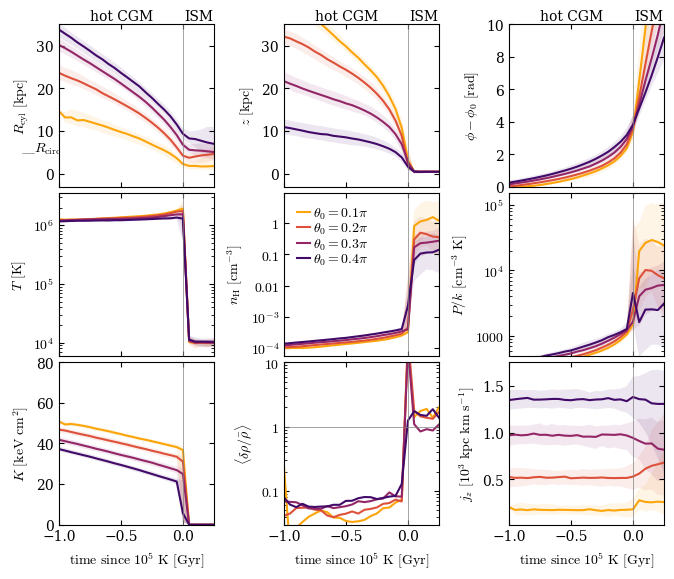

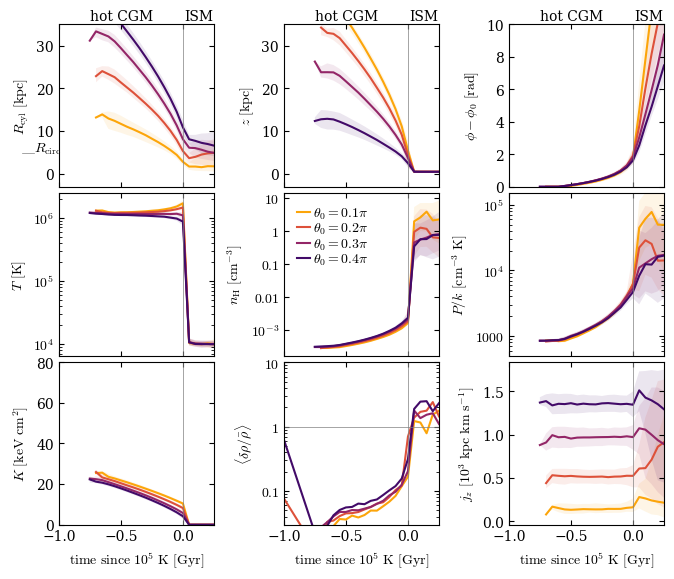

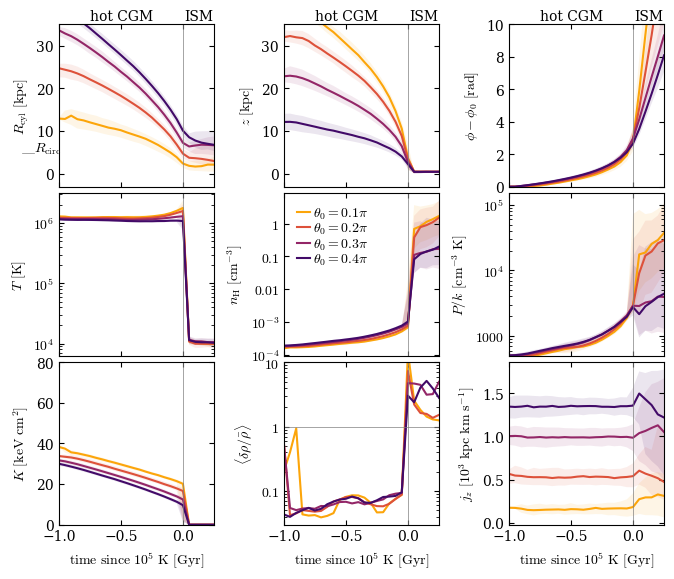

In [13]:
ts = -np.arange(Nsnapshots)*dt
ts = ts-ts[-1]
for isim,simname in enumerate(goodsims):
    print(simname)
    npz_fn = wd.tracksdir+simname+'/particle_tracks_%d_%d_%d_all.npz'%(Nsnapshots,dt,rmax)
    f = np.load(npz_fn)
    coords,vs,Ts,nHs,tcools=f['coords'],f['vs'],f['Ts'],f['nHs'],f['tcools'][:,::,...]
    isStar = np.isnan(Ts[:,:])
    tSF_ind  = np.array([np.concatenate([np.array([True]), isStar[:,i]]).nonzero()[0][-1] for i in range(isStar.shape[1])])
    tSF = ts[tSF_ind]
    isCool = Ts[:,:]<1e5
    t105_ind = np.array([np.concatenate([np.array([True]), isCool[:,i]]).nonzero()[0][-1] for i in range(isCool.shape[1])])
    t105= ts[t105_ind]
    mu = 0.62
    epsilons = Ts / (un.km**2/un.s**2 * cons.m_p / cons.k_B).to('K').value / (2./3* mu) 
    cs = (epsilons*10/9)**0.5 
    nHTs = nHs*Ts
    Ks = (cons.k_B*Ts*un.K/(nHs*un.cm**-3)**(2/3.)).to('keV*cm**2').value
    rhos = nHs*cons.m_p.to('g')/ff.X
    Edots = epsilons * (un.km**2/un.s**2).to('erg*g**-1') * (dt/tcools)
    dVs = np.log(nHs[:-1,:]/nHs[1:,:])
    dVs = np.pad(dVs,((0,1),(0,0)),mode='constant')
    PdVs = (mu * ff.X)**-1 * (cons.k_B * un.K / un.g).to('erg*g**-1') * nHTs  * dVs / rhos
    xs,ys,zs = coords[:,:,0],coords[:,:,1],coords[:,:,2]
    zs += 0.25 #disk is offset for some reason
    rs    = (xs**2+ys**2+zs**2)**0.5
    Rs    = (xs**2+ys**2)**0.5
    phis  = np.arctan2(ys,xs)
    thetas = np.arccos(zs/rs)
    dphis = ((phis[:-1,:]-phis[1:,:])%(2*np.pi))[::-1].cumsum(axis=0)[::-1]
    dphis = np.pad(dphis,((0,1),(0,0)),mode='constant')
    js = np.array([coords[:,:,1] * vs[:,:,2] - coords[:,:,2] * vs[:,:,1],
                   coords[:,:,2] * vs[:,:,0] - coords[:,:,0] * vs[:,:,2],
                   coords[:,:,0] * vs[:,:,1] - coords[:,:,1] * vs[:,:,0]])
    js = np.moveaxis(js,[0,1],[2,0])
    jzs = js[:,:,2]
    vphis = jzs/Rs
    Omegas = jzs/Rs**2 * un.km/un.s/un.kpc
    vzs = vs[:,:,2]
    vRs = (vs[:,:,0]*xs/rs + vs[:,:,1]*ys/rs)
    vrs = (vs[:,:,0]*xs/rs + vs[:,:,1]*ys/rs + vs[:,:,2]*zs/rs)
    v_abs = (vRs**2+vzs**2+vphis**2)**0.5
    # cos𝜃cos𝜙𝐱+cos𝜃sin𝜙𝐲−sin𝜃𝐳)𝜃
    vthetas = vs[:,:,0]*np.cos(thetas)*np.cos(phis) + vs[:,:,1]*np.cos(thetas)*np.sin(phis) - vs[:,:,2]*np.sin(thetas)
    vcyls = np.array([vRs,vphis,vzs]); vcyls=np.swapaxes(vcyls,0,1); vcyls=np.swapaxes(vcyls,1,2)
    vsphs = np.array([vrs,vphis,vthetas]); vsphs=np.swapaxes(vsphs,0,1); vsphs=np.swapaxes(vsphs,1,2)
    tffs   = (2**0.5*rs*un.kpc/vc).to('Myr')
    trots  = (Omegas**-1).to('Myr')
    tflows = (rs*un.kpc/(vrs*un.km/un.s)).to('Myr')
    theta_midbins = np.array([0.1,0.2,0.3,0.4,0.5])[:-1]*np.pi; l = len(theta_midbins)
    dtheta = 0.025*np.pi
    theta_inds = np.zeros((len(theta_midbins),thetas.shape[1]))
    for itheta,theta_midbin in enumerate(theta_midbins):
        theta_infty = np.median(thetas[-10:,:],axis=0)
        theta_inds[itheta,:] = (theta_infty<theta_midbin+dtheta) & (theta_infty>theta_midbin-dtheta)
    theta_inds = theta_inds.astype('bool')
    print(theta_inds.sum(axis=1))
    xls = -1.,0.25
    pl.figure(figsize=(fig_width_full*1.1,6.5)); pl.subplots_adjust(hspace=0.04,wspace=0.45)
    for i in range(9):
        ax = pl.subplot(3,3,i+1)
        if i==0:
            med_and_std_shift(Rs,theta_inds=theta_inds)
            pl.ylabel(r'$R_{\rm cyl}\ [{\rm kpc}]$')
            pl.ylim(-3,35)
            pl.text(-1.2,1.05*Rcirc.value,r'$R_{\rm circ}$')
            pl.plot([-1.3,-1.2],[Rcirc.value]*2,c='.5',lw=0.5,clip_on=False)
        if i==1: 
            med_and_std_shift(zs,theta_inds=theta_inds)
            pl.ylabel(r'$z\ [{\rm kpc}]$')
            pl.ylim(-3,35)
        if i==2:
            med_and_std_shift(dphis,theta_inds=theta_inds)
            pl.ylabel(r'$\phi-\phi_0\ [{\rm rad}]$')
            pl.ylim(0,10)
        if i==3:
            med_and_std_shift(Ts,theta_inds=theta_inds)
            pl.ylabel(r'$T\ [{\rm K}]$')
            ax.set_yscale('log'); ax.yaxis.set_major_formatter(u.arilogformatter)        
            #pl.text(-1,3e5,r'hot CGM')
            #pl.arrow(0.45,0.65,0.05,0.1,color='.5',width=0.001,head_width=0.03,head_length=0.05,overhang=0.05,transform=ax.transAxes, length_includes_head=True)
            #pl.text(-0.4,1e4,r'ISM',ha='center',va='center'); 
            #pl.arrow(0.675,0.1,0.13,0,color='.5',width=0.001,head_width=0.03,head_length=0.05,overhang=0.05,transform=ax.transAxes, length_includes_head=True)
        if i==4:
            med_and_std_shift(nHs,theta_inds=theta_inds)
            pl.ylabel(r'$n_{\rm H}\ [{\rm cm}^{-3}]$')
            ax.set_yscale('log'); ax.yaxis.set_major_formatter(u.arilogformatter)
            ax.yaxis.set_major_locator(ticker.LogLocator(numdecs=10,numticks=10))
            pl.legend(loc='upper left',ncol=1,frameon=False,labelspacing=0.,handlelength=1,columnspacing=0.5,handletextpad=0.2)
        if i==5:
            med_and_std_shift(2.3*nHTs,theta_inds=theta_inds)
            pl.ylabel(r'$P/k\ [{\rm cm}^{-3}\ {\rm K}]$')
            ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
            pl.ylim(0.5e3,1.5e5)
            ax.set_yscale('log'); ax.yaxis.set_major_formatter(u.arilogformatter)            
        if i==6:
            med_and_std_shift(Ks,theta_inds=theta_inds)
            pl.ylabel(r'$K\ [{\rm keV}\ {\rm cm}^2]$')
            pl.ylim(0,80)
        if i==7:
            relative_dispersion_shift(nHs,theta_inds=theta_inds)
            pl.ylabel(r'$\langle\delta \rho/\bar \rho\rangle$')
            pl.axhline(1,c='.5',lw=0.5)
            ax.set_yscale('log'); ax.yaxis.set_major_formatter(u.arilogformatter)            
            pl.ylim(0.03,10)
        if i==8:
            med_and_std_shift(jzs/1000,theta_inds=theta_inds)
            pl.ylabel(r'$j_z\ [10^3\ {\rm kpc}\ {\rm km}\ {\rm s}^{-1}]$')
        pl.xlim(*xls)
        pl.axvline(0,c='.5',lw=0.5)
        if i<=2: 
            pl.text(0.4,1.025,r'hot CGM',transform=ax.transAxes,ha='center')
            pl.text(0.9,1.025,r'ISM',transform=ax.transAxes,ha='center')
        if i>=6: pl.xlabel(r'${\rm time}\ {\rm since}\ 10^5\ {\rm K}\ [{\rm Gyr}]$')
        else: ax.xaxis.set_major_formatter(ticker.NullFormatter())
    pl.savefig(figdir+'tracking_properties_vs_t105_%s.pdf'%simname,bbox_inches='tight')

In [31]:
def v_turb_shift(vs,xs=ts_offset,theta_inds=None,t105_ind=None,ls='-'):
    for i,ind in enumerate(theta_midbins):
        _vals = vs[:,theta_inds[i]]
        vals = shift_arr(_vals,t105_ind[theta_inds[i]])
        vs_mean = np.mean(vals,axis=1)
        v_turb = np.mean(((vs[:,:,0].T-vs_mean[:,0])**2 + 
                          (vs[:,:,1].T-vs_mean[:,1])**2 + 
                          (vs[:,:,2].T-vs_mean[:,2])**2)/3,axis=0)**0.5
        pl.plot(xs/1000,v_turb,label=labels[i],c=colors[i],ls=ls)

vc150_Rs0_Mdot1242_Rcirc10_fgas02_res1e4
[ 90 185 266 288]
vc150_Rs3_Mdot7470_Rcirc10_fgas02_res1e4
[270 453 676 911]


/mnt/sw/nix/store/b4q5asj8flwlgmaijgj1r6wbmnls5x8k-python-3.9.15-view/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


vc150_Rs1_Mdot2486_Rcirc10_fgas02_res1e4
[139 296 429 459]


/mnt/sw/nix/store/b4q5asj8flwlgmaijgj1r6wbmnls5x8k-python-3.9.15-view/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1584: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


vc100_Rs2_Mdot743_Rcirc5_fgas02_res1e4
[ 55  98 142 138]


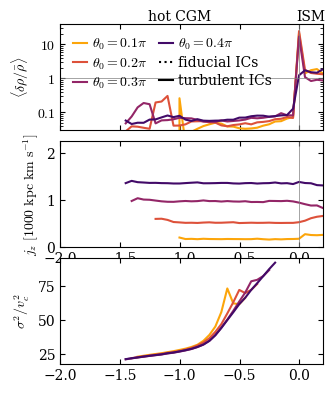

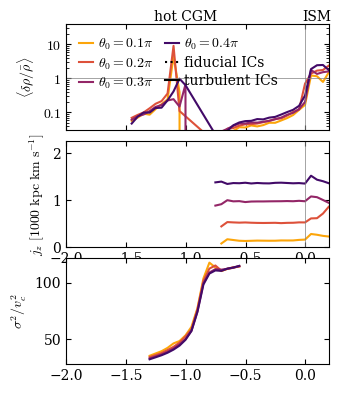

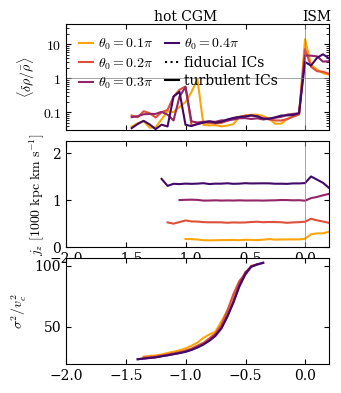

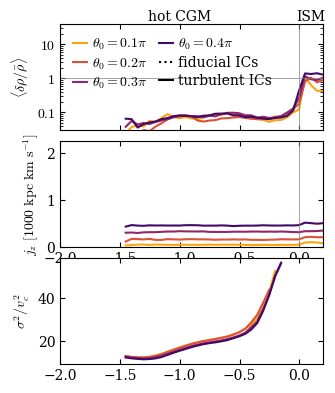

In [32]:
ts = -np.arange(Nsnapshots)*dt
ts = ts-ts[-1]
for isim,simname in enumerate(goodsims[:3]+goodsims[-1:]):
    print(simname)
    npz_fn = wd.tracksdir+simname+'/particle_tracks_%d_%d_%d_all.npz'%(Nsnapshots,dt,rmax)
    f = np.load(npz_fn)
    coords,vs,Ts,nHs,tcools=f['coords'],f['vs'],f['Ts'],f['nHs'],f['tcools'][:,::,...]
    isStar = np.isnan(Ts[:,:])
    tSF_ind  = np.array([np.concatenate([np.array([True]), isStar[:,i]]).nonzero()[0][-1] for i in range(isStar.shape[1])])
    tSF = ts[tSF_ind]
    isCool = Ts[:,:]<1e5
    t105_ind = np.array([np.concatenate([np.array([True]), isCool[:,i]]).nonzero()[0][-1] for i in range(isCool.shape[1])])
    t105= ts[t105_ind]
    mu = 0.62
    epsilons = Ts / (un.km**2/un.s**2 * cons.m_p / cons.k_B).to('K').value / (2./3* mu) 
    cs = (epsilons*10/9)**0.5 
    nHTs = nHs*Ts
    Ks = (cons.k_B*Ts*un.K/(nHs*un.cm**-3)**(2/3.)).to('keV*cm**2').value
    rhos = nHs*cons.m_p.to('g')/ff.X
    Edots = epsilons * (un.km**2/un.s**2).to('erg*g**-1') * (dt/tcools)
    dVs = np.log(nHs[:-1,:]/nHs[1:,:])
    dVs = np.pad(dVs,((0,1),(0,0)),mode='constant')
    PdVs = (mu * ff.X)**-1 * (cons.k_B * un.K / un.g).to('erg*g**-1') * nHTs  * dVs / rhos
    xs,ys,zs = coords[:,:,0],coords[:,:,1],coords[:,:,2]
    zs += 0.25 #disk is offset for some reason
    rs    = (xs**2+ys**2+zs**2)**0.5
    Rs    = (xs**2+ys**2)**0.5
    phis  = np.arctan2(ys,xs)
    thetas = np.arccos(zs/rs)
    dphis = ((phis[:-1,:]-phis[1:,:])%(2*np.pi))[::-1].cumsum(axis=0)[::-1]
    dphis = np.pad(dphis,((0,1),(0,0)),mode='constant')
    js = np.array([coords[:,:,1] * vs[:,:,2] - coords[:,:,2] * vs[:,:,1],
                   coords[:,:,2] * vs[:,:,0] - coords[:,:,0] * vs[:,:,2],
                   coords[:,:,0] * vs[:,:,1] - coords[:,:,1] * vs[:,:,0]])
    js = np.moveaxis(js,[0,1],[2,0])
    jzs = js[:,:,2]
    vphis = jzs/Rs
    Omegas = jzs/Rs**2 * un.km/un.s/un.kpc
    vzs = vs[:,:,2]
    vRs = (vs[:,:,0]*xs/rs + vs[:,:,1]*ys/rs)
    vrs = (vs[:,:,0]*xs/rs + vs[:,:,1]*ys/rs + vs[:,:,2]*zs/rs)
    v_abs = (vRs**2+vzs**2+vphis**2)**0.5
    # cos𝜃cos𝜙𝐱+cos𝜃sin𝜙𝐲−sin𝜃𝐳)𝜃
    vthetas = vs[:,:,0]*np.cos(thetas)*np.cos(phis) + vs[:,:,1]*np.cos(thetas)*np.sin(phis) - vs[:,:,2]*np.sin(thetas)
    vcyls = np.array([vRs,vphis,vzs]); vcyls=np.swapaxes(vcyls,0,1); vcyls=np.swapaxes(vcyls,1,2)
    vsphs = np.array([vrs,vphis,vthetas]); vsphs=np.swapaxes(vsphs,0,1); vsphs=np.swapaxes(vsphs,1,2)
    tffs   = (2**0.5*rs*un.kpc/vc).to('Myr')
    trots  = (Omegas**-1).to('Myr')
    tflows = (rs*un.kpc/(vrs*un.km/un.s)).to('Myr')
    theta_midbins = np.array([0.1,0.2,0.3,0.4,0.5])[:-1]*np.pi; l = len(theta_midbins)
    dtheta = 0.025*np.pi
    theta_inds = np.zeros((len(theta_midbins),thetas.shape[1]))
    for itheta,theta_midbin in enumerate(theta_midbins):
        theta_infty = np.median(thetas[-10:,:],axis=0)
        theta_inds[itheta,:] = (theta_infty<theta_midbin+dtheta) & (theta_infty>theta_midbin-dtheta)
    theta_inds = theta_inds.astype('bool')
    print(theta_inds.sum(axis=1))
    xls = -2.,0.2
    pl.figure(figsize=(fig_width_half,4.2)); pl.subplots_adjust(hspace=0.1,wspace=0.1,bottom=0.07)
    ax = pl.subplot(311)
    prev_labels = labels
    relative_dispersion_shift(nHs,theta_inds=theta_inds)
    pl.semilogy()
    ax.yaxis.set_major_formatter(u.arilogformatter)
    pl.ylabel(r'$\langle\delta \rho/\bar \rho\rangle$')
    pl.ylim(0.03,40)
    pl.axhline(1,c='.5',lw=0.5)
    pl.xlim(*xls)
    pl.axvline(0,c='.5',lw=0.5)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())    
    pl.axhline(0.01,c='k',ls=':',label="fiducial ICs")
    pl.axhline(0.01,c='k',ls='-',label='turbulent ICs')
    pl.legend(ncol=2,frameon=False,labelspacing=0.3,handlelength=1,columnspacing=0.8,handletextpad=0.4)
    pl.text(-1,50,'hot CGM',ha='center')
    pl.text(0.1,50,'ISM',ha='center')

    ax = pl.subplot(312)
    med_and_std_shift(jzs/1000,theta_inds=theta_inds,show_std=False)    
    pl.xlabel(r'${\rm time}\ {\rm since}\ 10^5\ {\rm K}\ [{\rm Gyr}]$')
    pl.axvline(0,c='.5',lw=0.5)
    pl.ylabel(r'$j_z\ [1000\ {\rm kpc}\ {\rm km}\ {\rm s}^{-1}]$')
    pl.ylim(0,2.25)
    pl.xlim(*xls)
    ax = pl.subplot(313)
    v_turb_shift(vs,theta_inds=theta_inds,t105_ind=t105_ind)
    pl.ylabel(r'$\sigma^2/v_c^2$')
    pl.xlim(*xls)
    pl.savefig(figdir+'effect_of_turbulence_%s.pdf'%simname,bbox_inches='tight')

# turbulent velocity

In [48]:
cos_theta_bins = np.arange(0,1,0.01)
cos_theta_midbins = (cos_theta_bins[1:]+cos_theta_bins[:-1])/2
log_rbins = np.arange(0.,2,0.01)
log_rbins_midbins = (log_rbins[1:]+log_rbins[:-1])/2

In [58]:
def profile2D(snapshot,attr,weight='MW',arr=None,power=1,*args,**kwargs):
    k = lambda attr,weight=weight: attr+'_r_theta_%s'%weight
    #if not self.isSaved(k(attr)):
    if weight=='VW': weightvals = snapshot.volume()
    if weight=='MW': weightvals = snapshot.masses()       
    if weight=='HI': weightvals = snapshot.HImasses()
    if arr is None: arr = getattr(snapshot,attr)(*args,**kwargs)
    m,x,y,_ = scipy.stats.binned_statistic_2d(log(snapshot.rs()),
                                              snapshot.cos_theta(),
                                              arr**power*weightvals,
                                              statistic='sum',
                                              bins=(log_rbins,cos_theta_bins))
    m_weights,x,y,_ = scipy.stats.binned_statistic_2d(log(snapshot.rs()),
                                              snapshot.cos_theta(),
                                              weightvals,
                                              statistic='sum',
                                              bins=(log_rbins,cos_theta_bins))
     #   snapshot.save(k(attr), m)
     #   snapshot.save(k(attr)+'_bins_r',x)
     #   snapshot.save(k(attr)+'_bins_theta',y) 
    return m/m_weights#self.get_saved(k(attr)),self.get_saved(k(attr)+'_bins_r'),self.get_saved(k(attr)+'_bins_theta')


In [62]:
simnames

('vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking',
 'vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3',
 'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3',
 'vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3',
 'vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3',
 'vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3',
 'vc200_Rs20_Mdot4536_Rcirc1_fgas02_res1e4_vturb3',
 'vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3',
 'vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3',
 'vc150_Rs0_Mdot1242_Rcirc10_fgas02_res1e4',
 'vc150_Rs3_Mdot7470_Rcirc10_fgas02_res1e4',
 'vc150_Rs1_Mdot2486_Rcirc10_fgas02_res1e4',
 'vc100_Rs0_Mdot184_Rcirc5_fgas02_res1e4',
 'vc100_Rs2_Mdot743_Rcirc5_fgas02_res1e4')

In [77]:
import first_pass as l
simname_turb = 'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e4_vturb30'
simname_noturb = 'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e4'
goodsims2 = [simname_noturb,simname_turb]
var = []; goods=[]
for isim,simname in enumerate(goodsims2+list(simnames)):
    vc = float(simname.split('_')[0][2:]) * un.km/un.s 
    Rcirc = float(simname.split('_')[3][5:]) * un.kpc  
    if Rcirc<10*un.kpc: continue
    Mdot = float(simname.split('_')[2][4:]) /1000 * un.Msun/un.yr
    Rvir = 200*un.kpc
    simdir = '/mnt/home/jstern/Drummond_data/%s/output/'%simname
    sim = l.KY_sim(simname,simdir,Rvir,origin=np.zeros(3),Rcirc = Rcirc,snapshot_dt_Myr=50,pr=False,
          analyticGravity= Halo.PowerLaw(m=0.,vc_Rvir=vc,Rvir=Rvir))
    lastSnapshot = sim.Nsnapshots()-1
    snapshot = sim.getSnapshot(lastSnapshot)
    goods.append(simname)
    var.append(np.array([profile2D(snapshot,'v%s'%d,power=2) - 
                        profile2D(snapshot,'v%s'%d)**2 for d in ('rs','_phi','_theta')]))
    

/tmp/ipykernel_719659/1415783432.py:21: RuntimeWarning: invalid value encountered in true_divide
  return m/m_weights#self.get_saved(k(attr)),self.get_saved(k(attr)+'_bins_r'),self.get_saved(k(attr)+'_bins_theta')


/tmp/ipykernel_719659/2025226456.py:6: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  ls = ('-','--')[vc.value==150]
/tmp/ipykernel_719659/2025226456.py:10: RuntimeWarning: invalid value encountered in sqrt
  vals = (var[isim].sum(axis=0).T/3)[:,ind]**0.5


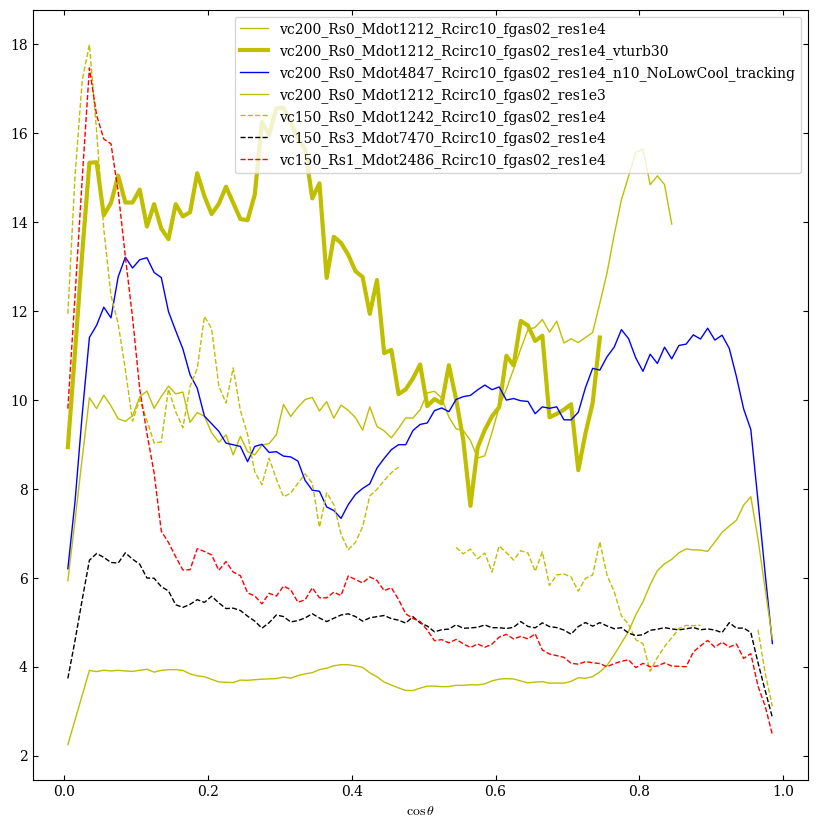

In [91]:
pl.figure(figsize=(10,10))
for isim,simname in enumerate(goods):
    Rcirc = float(simname.split('_')[3][5:]) * un.kpc  
    vc = float(simname.split('_')[0][2:]) * un.km/un.s 
    Mdot = float(simname.split('_')[2][4:]) /1000 * un.Msun/un.yr
    ls = ('-','--')[vc.value==150]
    lw = (1,3)['vturb' in simname]
    if Rcirc.value>10: continue
    ind = np.searchsorted(log_rbins_midbins,log(Rcirc.value*1.5))
    vals = (var[isim].sum(axis=0).T/3)[:,ind]**0.5
    pl.plot(cos_theta_midbins,smooth(vals,7),label=simname,ls=ls,c={'7':'k','4':'b','2':'r','1':'y'}['%d'%Mdot.value],lw=lw)
pl.xlabel(r'$\cos\theta$')
pl.legend()

In [74]:
simnames

('vc200_Rs0_Mdot4847_Rcirc10_fgas02_res1e4_n10_NoLowCool_tracking',
 'vc200_Rs0_Mdot1212_Rcirc1_fgas02_res1e4_vturb3',
 'vc200_Rs0_Mdot1212_Rcirc10_fgas02_res1e3',
 'vc200_Rs3_Mdot3668_Rcirc1_fgas02_res1e4_vturb3',
 'vc200_Rs0_Mdot1035_Rcirc15_fgas02_res1e3',
 'vc200_Rs0_Mdot2069_Rcirc15_fgas02_res1e3',
 'vc200_Rs20_Mdot4536_Rcirc1_fgas02_res1e4_vturb3',
 'vc230_Rs0_Mdot1013_Rcirc18_fgas02_res1e3',
 'vc210_Rs0_Mdot2001_Rcirc18_fgas02_res1e3',
 'vc150_Rs0_Mdot1242_Rcirc10_fgas02_res1e4',
 'vc150_Rs3_Mdot7470_Rcirc10_fgas02_res1e4',
 'vc150_Rs1_Mdot2486_Rcirc10_fgas02_res1e4',
 'vc100_Rs0_Mdot184_Rcirc5_fgas02_res1e4',
 'vc100_Rs2_Mdot743_Rcirc5_fgas02_res1e4')

In [73]:
goodsims

['vc150_Rs0_Mdot1242_Rcirc10_fgas02_res1e4',
 'vc150_Rs3_Mdot7470_Rcirc10_fgas02_res1e4',
 'vc150_Rs1_Mdot2486_Rcirc10_fgas02_res1e4',
 'vc100_Rs0_Mdot184_Rcirc5_fgas02_res1e4',
 'vc100_Rs2_Mdot743_Rcirc5_fgas02_res1e4']

/tmp/ipykernel_719659/3479843582.py:3: RuntimeWarning: invalid value encountered in sqrt
  pl.pcolormesh(log_rbins_midbins,cos_theta_midbins,(var[isim].sum(axis=0).T/3)**0.5,vmin=0,vmax=50)


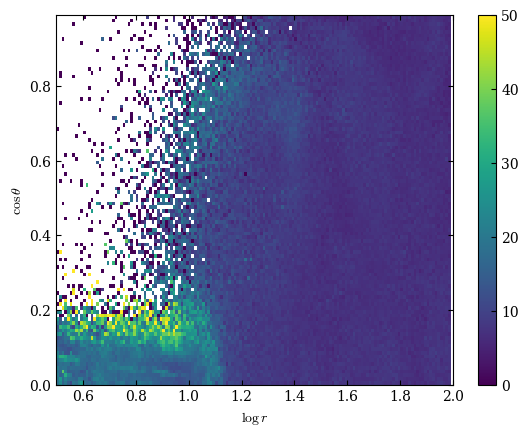

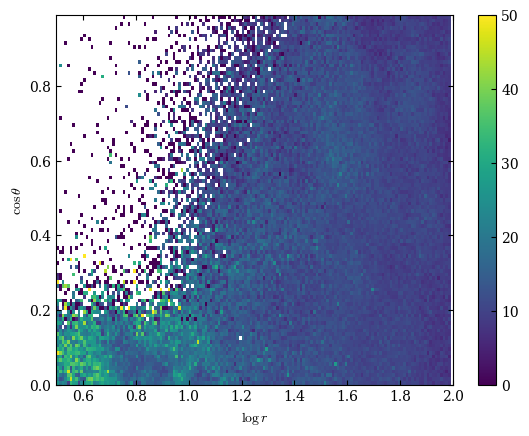

In [67]:
for isim,simname in enumerate(goodsims2):
    pl.figure()
    pl.pcolormesh(log_rbins_midbins,cos_theta_midbins,(var[isim].sum(axis=0).T/3)**0.5,vmin=0,vmax=50)
    pl.colorbar()
    pl.xlabel(r'$\log r$')
    pl.ylabel(r'$\cos\theta$')
    pl.xlim(0.5,2)